# Kendall's $\tau$

In this tutorial, we explore

- The theory behind the Kendall test statistic and p-value
- The features of the implementation

## Theory

The following description is adapted from [[1]](https://arxiv.org/abs/1907.02088):

To formulate Kendall [[2]](https://academic.oup.com/biomet/article-abstract/30/1-2/81/176907?redirectedFrom=fulltext), define $(x_i, y_i)$ and $(x_j, y_j)$ as concordant if the ranks agree: $x_i > x_j$ and $y_i > y_j$ or $x_i < x_j$ and $y_i < y_j$. They are discordant if the ranks disagree: $x_i > x_j$ and $y_i < y_j$ or $x_i < x_j$ and $y_i > y_j$. If $x_i = x_j$ and $y_i = y_j$, the pair is said to be tied. Let $n_c$ and $n_d$ be the number of concordant and discordant pairs respectively and $n_0 = n (n - 1) / 2$. In the case of no ties, the test statistic is defined as

$$\mathrm{Kendall}_n = \frac{n_c - n_d}{n_0},$$

Further define

$$n_1 = \sum_i \frac{t_i (t_i - 1)}{2},$$
$$n_2 = \sum_j \frac{u_j (u_j - 1)}{2},$$
$$t_i = \mathrm{number\ of\ tied\ values\ in\ the}\ i \mathrm{th\ group\ of\ ties\ in\ the\ first\ quantity\, and},$$
$$u_j = \mathrm{number\ of\ tied\ values\ in\ the}\ j \mathrm{th\ group\ of\ ties\ in\ the\ second\ quantity}.$$

In the case of ties, the statistic is calculated as in [[3]](https://onlinelibrary.wiley.com/doi/book/10.1002/9780470594001)

$$\mathrm{Kendall}_n = \frac{n_c - n_d}{\sqrt{(n_0 - n_1) (n_0 - n_2)}}.$$

This implementation wraps `scipy.stats.kendalltau` [[4]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html) to conform to the `mgcpy` API.

## Using Kendall's $\tau$

Before delving straight into function calls, let's first import some useful functions, to ensure consistency in these examples, we set the seed:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns; sns.set(style="white")

from mgcpy.independence_tests.kendall_spearman import KendallSpearman
from mgcpy.benchmarks import simulations as sims

np.random.seed(12345678)

To start, let's simulate some linear data:

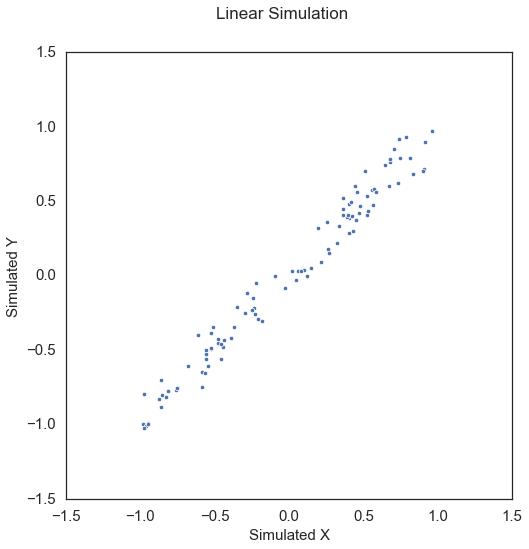

In [2]:
x, y = sims.linear_sim(num_samp=100, num_dim=1, noise=0.1)

fig = plt.figure(figsize=(8,8))
fig.suptitle("Linear Simulation", fontsize=17)
ax = sns.scatterplot(x=x[:,0], y=y[:,0])
ax.set_xlabel('Simulated X', fontsize=15)
ax.set_ylabel('Simulated Y', fontsize=15) 
plt.axis('equal')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The test statistic and p-value can be called by creating the `KendallSpearman` object and simply calling the corresponding test statistic and p-value methods. When creating the object, it is necessary to define the `which_test` parameter so that the correct test is run (Kendall in this case).

In [3]:
kendall = KendallSpearman(which_test="kendall")
kendall_statistic, independence_test_metadata = kendall.test_statistic(x, y)
p_value, _ = kendall.p_value(x, y)

print("Kendall test statistic:", kendall_statistic)
print("P Value:", p_value)

Kendall test statistic: 0.8905050505050507
P Value: 2.2897821932369628e-39


**Note that Kendall only operates on univariate data.**

# Spearman's $\rho$

In this tutorial, we explore

- The theory behind the Spearman test statistic and p-value
- The features of the implementation

## Theory

Spearman and Kendall are closely related because they both operate on univariate ranked data. The following description is adapted from [[1]](https://arxiv.org/abs/1907.02088):

Spearman can be thought of as closely related to Pearson's product-moment correlation [[5]](https://www.jstor.org/stable/1412159?origin=crossref&seq=1#metadata_info_tab_contents). Suppose that $\mathrm{rg}_{x_i}$ and $\mathrm{rg}_{y_i}$ are the respective ranks of $n$ raw scores $x_i$ and $y_i$, $\rho$ denotes the Pearson's coefficient but applied to rank variables, $\hat{\mathrm{cov}} (\mathrm{rg}_{\mathbf{x}}, \mathrm{rg}_{\mathbf{y}})$ denotes the covariance of the rank variables, and $\hat{\sigma}_{\mathrm{rg}_{\mathbf{x}}}$ and  $\hat{\sigma}_{\mathrm{rg}_{\mathbf{y}}}$ denote the standard deviations of the rank variables. The statistic is

$$\mathrm{Spearman}_s = \rho_{\mathrm{rg}_{\mathbf{x}}, \mathrm{rg}_{\mathbf{y}}} = \frac{\hat{\mathrm{cov}} (\mathrm{rg}_{\mathbf{x}}, \mathrm{rg}_{\mathbf{y}})}{\hat{\sigma}_{\mathrm{rg}_{\mathbf{x}}} \hat{\sigma}_{\mathrm{rg}_{\mathbf{y}}}}.$$

This implementation wraps `scipy.stats.spearmanr` [[4]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) to conform to the `mgcpy` API.

## Using Spearman's $\rho$

The test statistic and p-value can be called by creating the `KendallSpearman` object and simply calling the corresponding test statistic and p-value methods. When creating the object, it is necessary to define the `which_test` parameter so that the correct test is run (Spearman in this case). Using the same linear relationship as before:

In [4]:
spearman = KendallSpearman(which_test="spearman")
spearman_statistic, independence_test_metadata = spearman.test_statistic(x, y)
p_value, _ = spearman.p_value(x, y)

print("Kendall test statistic:", spearman_statistic)
print("P Value:", p_value)

Kendall test statistic: 0.982214221422142
P Value: 5.3309467589776e-73


**Note that Spearman only operates on univariate data.**